# **Similarity between two structures**

## **Install conda and rdkid**

In [1]:
# Install conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-08 19:24:22--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   203MB/s    in 0.4s    

2021-04-08 19:24:22 (203 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [2]:
import pandas as pd
df = pd.read_csv('CHEMBL203_2classes_data.csv')
df.head(5)

,molecule_chembl_id,canonical_smiles,pIC50,bioactivity_class
0,CHEMBL63786,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,active
1,CHEMBL53753,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,active
2,CHEMBL66031,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,active
3,CHEMBL176582,Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21,11.000000,active
4,CHEMBL174426,Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21,10.602060,active


In [3]:
print(
    ' active',df['bioactivity_class'][df['bioactivity_class']=="active"].count(),'\n',
    'inactive',df['bioactivity_class'][df['bioactivity_class']=="inactive"].count(),'\n'
)

 active 1191 
 inactive 1186 



In [4]:
acive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="active"]
#acive_canonical_smiles.count()
#len(acive_canonical_smiles)
acive_canonical_smiles.head(3)

0      Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1        CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1
2    Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
Name: canonical_smiles, dtype: object

In [5]:
inacive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="inactive"].reset_index().drop(columns='index')
inacive_canonical_smiles = inacive_canonical_smiles['canonical_smiles']

In [6]:
inacive_canonical_smiles.count()
inacive_canonical_smiles.head(3)

0    O=C(/C=C/c1ccccc1)Nc1cccc(-c2c(-c3ccccc3)oc3nc...
1    c1ccc(Cc2nc3cc(Nc4ncnc5nn6ccccc6c45)ccc3[nH]2)cc1
2    CC(=O)N1N=C(c2ccc(F)cc2)CC1c1ccc(C(=O)OCCn2c([...
Name: canonical_smiles, dtype: object

In [7]:
from rdkit import Chem,DataStructs

try_compd = acive_canonical_smiles[0]
try_mol = Chem.MolFromSmiles(str(try_compd))
try_fp = Chem.RDKFingerprint(try_mol)

try_fp[2]

0

## **Calculate SMILE Similarity**

In [8]:
from rdkit import Chem,DataStructs

row_size = len(acive_canonical_smiles) #active
column_size = len(inacive_canonical_smiles) #inactive

table= [ [ 0 for i in range(column_size) ] for j in range(row_size) ]
#np.shape(table)
#pd.DataFrame(table)

for row in range(0,row_size):
  for col in range(0,column_size):
    act_comp = acive_canonical_smiles[row]
    inact_comp = inacive_canonical_smiles[col]

    act_mol = Chem.MolFromSmiles(str(act_comp))
    inact_mol = Chem.MolFromSmiles(str(inact_comp))

    # the default fingerprint is path-based:
    act_fp = Chem.RDKFingerprint(act_mol)
    inact_fp = Chem.RDKFingerprint(inact_mol)

    table[row][col]= DataStructs.TanimotoSimilarity(act_fp,inact_fp)

In [9]:
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185
0,0.271540,0.445623,0.247573,0.281063,0.194726,0.274017,0.646684,0.267026,0.476274,0.381041,0.160880,0.206961,0.174586,0.266935,0.452043,0.290299,0.286804,0.340767,0.322785,0.294211,0.246809,0.325000,0.174054,0.227979,0.231159,0.359121,0.389255,0.567384,0.174431,0.289703,0.323295,0.352657,0.406997,0.267569,0.227672,0.239714,0.457358,0.302281,0.504873,0.243416,...,0.215589,0.209454,0.215589,0.209083,0.202862,0.202862,0.209083,0.203028,0.196678,0.114103,0.277906,0.272659,0.075000,0.173618,0.181728,0.115764,0.115099,0.102881,0.114137,0.134071,0.152452,0.105820,0.322353,0.291857,0.317965,0.271036,0.165422,0.325153,0.318530,0.322426,0.320442,0.274955,0.191089,0.084488,0.094840,0.092958,0.074526,0.116037,0.225464,0.173871
1,0.320438,0.460438,0.284844,0.307377,0.217143,0.314756,0.591533,0.306271,0.448332,0.364888,0.173404,0.228242,0.184318,0.296354,0.436037,0.331150,0.311079,0.356176,0.347529,0.295438,0.271732,0.328734,0.189569,0.251957,0.256285,0.388540,0.410394,0.489960,0.195960,0.327794,0.320630,0.394984,0.449047,0.305117,0.254944,0.237302,0.442097,0.357053,0.463936,0.286212,...,0.232101,0.230769,0.232101,0.227457,0.226143,0.226143,0.227457,0.220353,0.219087,0.113793,0.317365,0.310573,0.072258,0.197441,0.198885,0.119021,0.119687,0.099757,0.119020,0.135556,0.168150,0.116945,0.377024,0.303448,0.369159,0.284519,0.189621,0.380665,0.368896,0.367315,0.374419,0.286325,0.194317,0.090123,0.109023,0.092269,0.075904,0.122066,0.171625,0.199637
2,0.303342,0.501751,0.274763,0.300578,0.204981,0.299621,0.624408,0.291365,0.512027,0.389530,0.169546,0.224618,0.191867,0.289844,0.490180,0.317553,0.304059,0.348382,0.342529,0.305873,0.268461,0.334158,0.188583,0.251079,0.256356,0.377165,0.396226,0.552492,0.186544,0.322395,0.349914,0.368585,0.434855,0.302355,0.251425,0.244482,0.493038,0.338558,0.496774,0.274948,...,0.233839,0.229560,0.233839,0.227160,0.222853,0.222853,0.227160,0.217872,0.213568,0.117786,0.307288,0.307407,0.075597,0.184573,0.190253,0.124287,0.122426,0.100872,0.119190,0.142531,0.166834,0.113001,0.347063,0.301920,0.340015,0.283898,0.173173,0.351271,0.342772,0.343387,0.345357,0.285714,0.202437,0.082811,0.096324,0.098845,0.076449,0.119617,0.211098,0.189041
3,0.338355,0.505795,0.319361,0.319969,0.216071,0.332511,0.577540,0.320743,0.549460,0.401007,0.177579,0.232773,0.207164,0.318557,0.532643,0.364479,0.330725,0.362682,0.370753,0.329429,0.297261,0.354052,0.196984,0.283426,0.287081,0.399547,0.395623,0.522330,0.196226,0.355731,0.360908,0.378698,0.445584,0.335404,0.281680,0.267151,0.531797,0.380395,0.490940,0.306495,...,0.253799,0.250375,0.253799,0.245121,0.241724,0.241724,0.245121,0.235910,0.232540,0.126203,0.321864,0.326473,0.073944,0.192472,0.196864,0.128364,0.126687,0.107623,0.121505,0.146114,0.175651,0.113537,0.369963,0.310345,0.360414,0.295200,0.180389,0.377522,0.367288,0.365727,0.368460,0.296085,0.216667,0.085297,0.091216,0.100917,0.080752,0.126761,0.203040,0.208942
4,0.335840,0.503306,0.320240,0.319969,0.218247,0.337461,0.579229,0.322436,0.531635,0.402183,0.176412,0.235889,0.207164,0.317568,0.515748,0.361566,0.323197,0.363783,0.371766,0.329429,0.298997,0.346635,0.195857,0.281641,0.285324,0.402725,0.399156,0.522330,0.195099,0.358032,0.358704,0.375646,0.442172,0.328801,0.280798,0.271255,0.514937,0.376999,0.492228,0.308266,...,0.253799,0.251313,0.253799,0.244150,0.241724,0.241724,0.244150,0.233923,0.231562,0.122601,0.322812,0.324592,0.071429,0.194516,0.197908,0.127198,0.129032,0.102679,0.119099,0.143744,0.171296,0.111111,0.373990,0.312500,0.366469,0.296237,0.177122,0.379509,0.372210,0.367756,0.372506,0.297143,0.214536,0.084081,0.093679,0.097143,0.079558,0.123110,0.201735,0.207904
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [10]:
import numpy as np

pd.DataFrame(table).to_csv("EGFR_EDA_similarity_matrix.csv", index=None)

## **Heat Map of Similarity**

In [11]:
import pandas as pd

df2 = pd.read_csv('EGFR_EDA_similarity_matrix.csv')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185
0,0.271540,0.445623,0.247573,0.281063,0.194726,0.274017,0.646684,0.267026,0.476274,0.381041,0.160880,0.206961,0.174586,0.266935,0.452043,0.290299,0.286804,0.340767,0.322785,0.294211,0.246809,0.325000,0.174054,0.227979,0.231159,0.359121,0.389255,0.567384,0.174431,0.289703,0.323295,0.352657,0.406997,0.267569,0.227672,0.239714,0.457358,0.302281,0.504873,0.243416,...,0.215589,0.209454,0.215589,0.209083,0.202862,0.202862,0.209083,0.203028,0.196678,0.114103,0.277906,0.272659,0.075000,0.173618,0.181728,0.115764,0.115099,0.102881,0.114137,0.134071,0.152452,0.105820,0.322353,0.291857,0.317965,0.271036,0.165422,0.325153,0.318530,0.322426,0.320442,0.274955,0.191089,0.084488,0.094840,0.092958,0.074526,0.116037,0.225464,0.173871
1,0.320438,0.460438,0.284844,0.307377,0.217143,0.314756,0.591533,0.306271,0.448332,0.364888,0.173404,0.228242,0.184318,0.296354,0.436037,0.331150,0.311079,0.356176,0.347529,0.295438,0.271732,0.328734,0.189569,0.251957,0.256285,0.388540,0.410394,0.489960,0.195960,0.327794,0.320630,0.394984,0.449047,0.305117,0.254944,0.237302,0.442097,0.357053,0.463936,0.286212,...,0.232101,0.230769,0.232101,0.227457,0.226143,0.226143,0.227457,0.220353,0.219087,0.113793,0.317365,0.310573,0.072258,0.197441,0.198885,0.119021,0.119687,0.099757,0.119020,0.135556,0.168150,0.116945,0.377024,0.303448,0.369159,0.284519,0.189621,0.380665,0.368896,0.367315,0.374419,0.286325,0.194317,0.090123,0.109023,0.092269,0.075904,0.122066,0.171625,0.199637
2,0.303342,0.501751,0.274763,0.300578,0.204981,0.299621,0.624408,0.291365,0.512027,0.389530,0.169546,0.224618,0.191867,0.289844,0.490180,0.317553,0.304059,0.348382,0.342529,0.305873,0.268461,0.334158,0.188583,0.251079,0.256356,0.377165,0.396226,0.552492,0.186544,0.322395,0.349914,0.368585,0.434855,0.302355,0.251425,0.244482,0.493038,0.338558,0.496774,0.274948,...,0.233839,0.229560,0.233839,0.227160,0.222853,0.222853,0.227160,0.217872,0.213568,0.117786,0.307288,0.307407,0.075597,0.184573,0.190253,0.124287,0.122426,0.100872,0.119190,0.142531,0.166834,0.113001,0.347063,0.301920,0.340015,0.283898,0.173173,0.351271,0.342772,0.343387,0.345357,0.285714,0.202437,0.082811,0.096324,0.098845,0.076449,0.119617,0.211098,0.189041
3,0.338355,0.505795,0.319361,0.319969,0.216071,0.332511,0.577540,0.320743,0.549460,0.401007,0.177579,0.232773,0.207164,0.318557,0.532643,0.364479,0.330725,0.362682,0.370753,0.329429,0.297261,0.354052,0.196984,0.283426,0.287081,0.399547,0.395623,0.522330,0.196226,0.355731,0.360908,0.378698,0.445584,0.335404,0.281680,0.267151,0.531797,0.380395,0.490940,0.306495,...,0.253799,0.250375,0.253799,0.245121,0.241724,0.241724,0.245121,0.235910,0.232540,0.126203,0.321864,0.326473,0.073944,0.192472,0.196864,0.128364,0.126687,0.107623,0.121505,0.146114,0.175651,0.113537,0.369963,0.310345,0.360414,0.295200,0.180389,0.377522,0.367288,0.365727,0.368460,0.296085,0.216667,0.085297,0.091216,0.100917,0.080752,0.126761,0.203040,0.208942
4,0.335840,0.503306,0.320240,0.319969,0.218247,0.337461,0.579229,0.322436,0.531635,0.402183,0.176412,0.235889,0.207164,0.317568,0.515748,0.361566,0.323197,0.363783,0.371766,0.329429,0.298997,0.346635,0.195857,0.281641,0.285324,0.402725,0.399156,0.522330,0.195099,0.358032,0.358704,0.375646,0.442172,0.328801,0.280798,0.271255,0.514937,0.376999,0.492228,0.308266,...,0.253799,0.251313,0.253799,0.244150,0.241724,0.241724,0.244150,0.233923,0.231562,0.122601,0.322812,0.324592,0.071429,0.194516,0.197908,0.127198,0.129032,0.102679,0.119099,0.143744,0.171296,0.111111,0.373990,0.312500,0.366469,0.296237,0.177122,0.379509,0.372210,0.367756,0.372506,0.297143,0.214536,0.084081,0.093679,0.097143,0.079558,0.123110,0.201735,0.207904
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [12]:
'''import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize=(20, 20))

sns.heatmap(df2)
plt.savefig('EGFR_EDA_heatmap_similarity.pdf')
plt.show()'''

"import numpy as np\nimport seaborn as sns\nimport matplotlib.pylab as plt\n\nplt.figure(figsize=(20, 20))\n\nsns.heatmap(df2)\nplt.savefig('EGFR_EDA_heatmap_similarity.pdf')\nplt.show()"

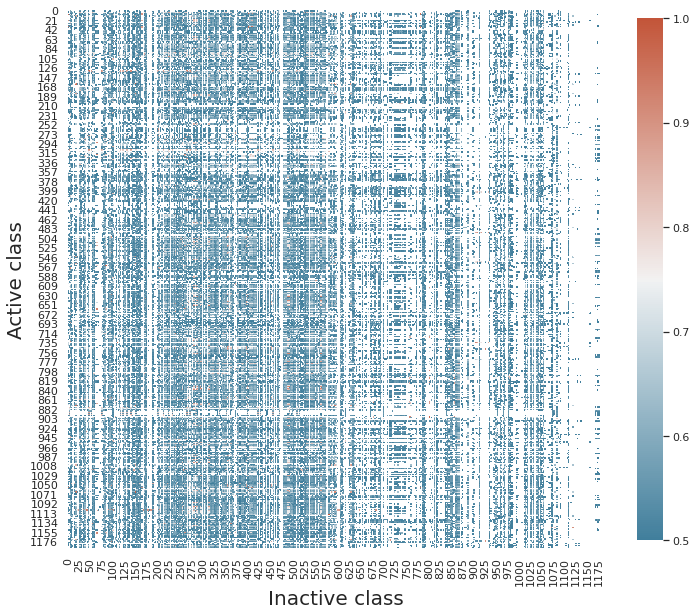

In [13]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.abs(df2) < 0.5

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2, mask=mask, cmap=cmap, cbar_kws={"shrink":.8}, square=True) #, vmax=.3, center=0, square=True, linewidths=.5

plt.xlabel('Inactive class', fontsize=20)
plt.ylabel('Active class', fontsize=20)

#fig.suptitle('Correlation matrix of bioactivity classes', fontsize=15)

plt.savefig('EGFR_EDA_heatmap_similarity.pdf')

Text(84.5, 0.5, 'Active class')

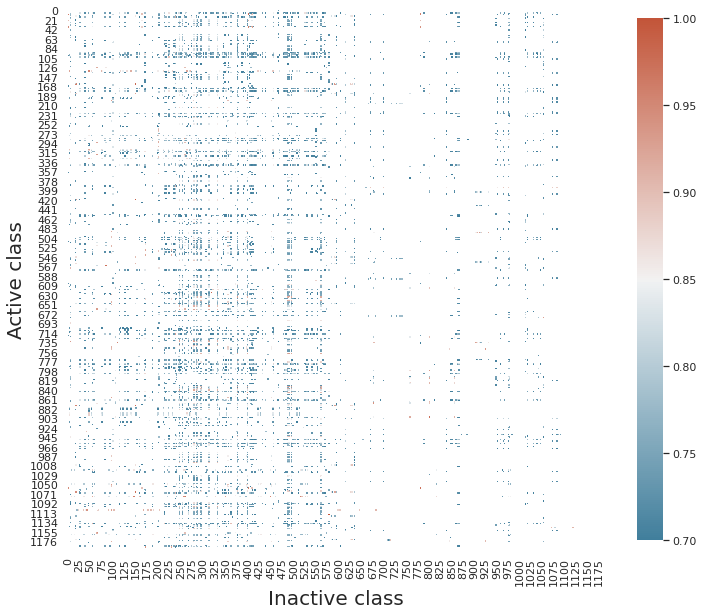

In [14]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.abs(df2) < 0.7

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2, mask=mask, cmap=cmap, cbar_kws={"shrink":.8}, square=True) #, vmax=.3, center=0, square=True, linewidths=.5

plt.xlabel('Inactive class', fontsize=20)
plt.ylabel('Active class', fontsize=20)

#fig.suptitle('Correlation matrix of bioactivity classes', fontsize=15)
